<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/DAY6_Softmax_Classifier_on_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DAY6_Softmax Classifier on FashionMNIST

Description

- build a neural network classifier using a softmax output layer to classify clothing items from the FashionMNIST dataset
- introduction to multi-class classification using softmax and cross-entropy.

##### Goal: Train a model to classify images into 10 clothing categories using a softmax layer.

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
transform = transforms.ToTensor()
train_ds = datasets.FashionMNIST(root='data', train=True, download=True,
                                 transform=transform)
test_ds = datasets.FashionMNIST(root='data',train=False, download=True,
                                transform=transform)

In [6]:
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1000)

In [12]:
class SoftmaxClassifier(nn.Module):
  def __init__(self):
    super(SoftmaxClassifier, self).__init__()
    self.linear = nn.Linear(28*28, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    return self.linear(x)

model = SoftmaxClassifier()

# Cross-entropy loss applies softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Epoch 1: 100%|██████████| 938/938 [00:12<00:00, 75.39it/s, loss=0.631]


Epoch 1, Avg Loss: 0.4339


Epoch 2: 100%|██████████| 938/938 [00:10<00:00, 92.29it/s, loss=0.212]


Epoch 2, Avg Loss: 0.4279


Epoch 3: 100%|██████████| 938/938 [00:10<00:00, 87.21it/s, loss=0.351]


Epoch 3, Avg Loss: 0.4256


Epoch 4: 100%|██████████| 938/938 [00:11<00:00, 84.84it/s, loss=0.522]


Epoch 4, Avg Loss: 0.4207


Epoch 5: 100%|██████████| 938/938 [00:10<00:00, 86.48it/s, loss=0.434]


Epoch 5, Avg Loss: 0.4185


Epoch 6: 100%|██████████| 938/938 [00:11<00:00, 80.13it/s, loss=0.603]


Epoch 6, Avg Loss: 0.4153


Epoch 7: 100%|██████████| 938/938 [00:10<00:00, 86.04it/s, loss=0.26]


Epoch 7, Avg Loss: 0.4124


Epoch 8: 100%|██████████| 938/938 [00:10<00:00, 89.29it/s, loss=0.512]


Epoch 8, Avg Loss: 0.4109


Epoch 9: 100%|██████████| 938/938 [00:11<00:00, 83.63it/s, loss=0.251]


Epoch 9, Avg Loss: 0.4097


Epoch 10: 100%|██████████| 938/938 [00:11<00:00, 82.63it/s, loss=0.283]


Epoch 10, Avg Loss: 0.4065


Epoch 11: 100%|██████████| 938/938 [00:10<00:00, 86.29it/s, loss=0.384]


Epoch 11, Avg Loss: 0.4058


Epoch 12: 100%|██████████| 938/938 [00:10<00:00, 86.52it/s, loss=0.642]


Epoch 12, Avg Loss: 0.4051


Epoch 13: 100%|██████████| 938/938 [00:10<00:00, 87.68it/s, loss=0.227]


Epoch 13, Avg Loss: 0.4035


Epoch 14: 100%|██████████| 938/938 [00:10<00:00, 87.37it/s, loss=0.383]


Epoch 14, Avg Loss: 0.4007


Epoch 15: 100%|██████████| 938/938 [00:10<00:00, 92.25it/s, loss=0.56]


Epoch 15, Avg Loss: 0.4017


Epoch 16: 100%|██████████| 938/938 [00:10<00:00, 85.89it/s, loss=0.249]


Epoch 16, Avg Loss: 0.3986


Epoch 17: 100%|██████████| 938/938 [00:11<00:00, 84.23it/s, loss=0.403]


Epoch 17, Avg Loss: 0.3990


Epoch 18: 100%|██████████| 938/938 [00:10<00:00, 85.72it/s, loss=0.323]


Epoch 18, Avg Loss: 0.3979


Epoch 19: 100%|██████████| 938/938 [00:11<00:00, 82.45it/s, loss=0.251]


Epoch 19, Avg Loss: 0.3963


Epoch 20: 100%|██████████| 938/938 [00:10<00:00, 86.86it/s, loss=0.297]


Epoch 20, Avg Loss: 0.3951


Epoch 21: 100%|██████████| 938/938 [00:10<00:00, 89.12it/s, loss=0.19]


Epoch 21, Avg Loss: 0.3949

✅ Test Accuracy: 83.40%


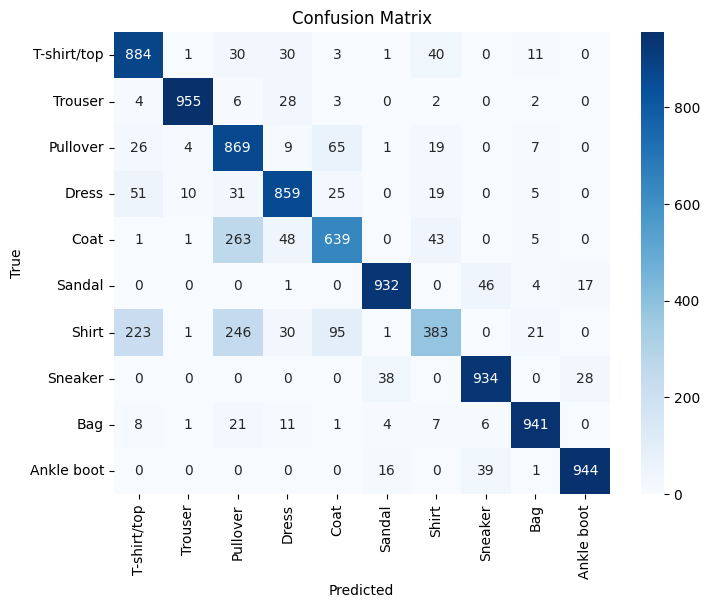


📊 Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.88      0.80      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.59      0.87      0.70      1000
       Dress       0.85      0.86      0.85      1000
        Coat       0.77      0.64      0.70      1000
      Sandal       0.94      0.93      0.94      1000
       Shirt       0.75      0.38      0.51      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [14]:
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Training loop with progress bar
for epoch in range(21):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_dl, desc=f"Epoch {epoch+1}")

    for images, labels in progress_bar:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1}, Avg Loss: {running_loss / len(train_dl):.4f}")

# Evaluation on test set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_ds.classes,
            yticklabels=train_ds.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.classes))
